In coursera Deep Learning Specialization course# 1, we started our journey of deep learning by building a logistic regression from scratch to classify **cat vs non-cat** images. Gradually, we implemented 2 layer Neural Network and finally, a deep neural network.

In this section, I will try build a multiple linear regression model by feeding in several explanatory variables to predict the outcome of a response variable. The main difference linear regression is that we are predicting 

The **Diabetes dataset** for this project is taken from sklearn library. Using this databset, we will build a Multiple LR model for predicting **quantitative measure of disease progression after one year** from the values of several independent variables. After that, I will also implement 2 layer NNs and finally a deep NNs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
from lr import linear_regression_model
%matplotlib inline

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
Data Set Characteristics:

<h4>Number of Instances</h4>
442

<h4>Number of Attributes</h4>
First 10 columns are numeric predictive values

<h4>Target</h4>
Column 11 is a quantitative measure of disease progression one year after baseline

<h4>Attribute Information</h4>
<ol>
    <li> age age in years</li>
    <li> sex</li>
    <li> bmi body mass index</li>
    <li> bp average blood pressure</li>
    <li> s1 tc, T-Cells (a type of white blood cells)</li>
    <li> s2 ldl, low-density lipoproteins</li>
    <li> s3 hdl, high-density lipoproteins</li>
    <li> s4 tch, thyroid stimulating hormone </li>
    <li> s5 ltg, lamotrigine </li>
    <li> s6 glu, blood sugar level</li>
</ol>

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diab = pd.DataFrame(diabetes['data'])

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

In [6]:
diab.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
diab.columns = diabetes['feature_names']

In [8]:
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
X = diab

In [10]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [11]:
y = diabetes['target']

In [12]:
y.shape

(442,)

In [13]:
#split dataset into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=5)

In [14]:
X_train.shape

X_train = X_train.T

X_train.shape

y_train.shape

y_train = np.array([y_train])

y_train.shape

X_val.shape

X_val = X_val.T

X_val.shape

y_val = np.array([y_val])

y_val.shape

(1, 146)

**Part 1**
Linear Regression Model

epochs 100/2500: 
Training cost2308.1298040499983| validation cost2594.427109130992
Training mae58.2010606354993| validation mae61.86145077205999
epochs 200/2500: 
Training cost2001.5036573271611| validation cost2268.4341482437444
Training mae54.004660809369895| validation mae57.83880316548573
epochs 300/2500: 
Training cost1824.7414154227474| validation cost2080.4989057174444
Training mae51.12155578063862| validation mae55.183195546146656
epochs 400/2500: 
Training cost1716.7025755987195| validation cost1964.5018098921146
Training mae49.17540741942839| validation mae53.49961043471089
epochs 500/2500: 
Training cost1646.2272185170816| validation cost1887.2130691524058
Training mae47.820052674431075| validation mae52.36522778002136
epochs 600/2500: 
Training cost1597.2169615467587| validation cost1831.7711546066744
Training mae46.870896079206744| validation mae51.54399392115157
epochs 700/2500: 
Training cost1561.179363097949| validation cost1789.4756257016663
Training mae46.18196454890

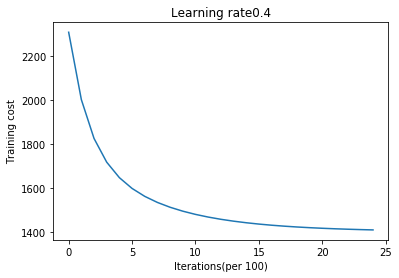

In [15]:
linear_regression_model(X_train, y_train, X_val, y_val, 0.4, 2500)

In the cells above, I build a linear regression model and tested the model by calculating **MEAN ABSOLUTE ERROR (MAE)**. In the cells below, we will run sklearn's linear model to calculate MAE and compare to my model.

In [30]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train.T, y_train.T)
prediction = lr.predict(X_val.T)

In [31]:
prediction.shape

(146, 1)

In [32]:
MAE_val_sklearn = (1/y_val.shape[1])*np.sum(np.abs(prediction-y_val.T))

In [33]:
MAE_val_sklearn

45.36454863073616